In [174]:
import os
import cv2
import numpy as np
import pandas as pd
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
import matplotlib.pyplot as plt
#similarity and distance calculation
from sklearn.metrics import pairwise

In [175]:
# Define constants
training_image_dir ='Images/school_images'
test_image_dir = 'Images/test_images'

In [176]:
app_sc = FaceAnalysis(name='buffalo_sc',providers=['CPUExecutionProvider'])
app_sc.prepare(ctx_id=0,det_size=(640,640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\umesh/.insightface\models\buffalo_sc\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\umesh/.insightface\models\buffalo_sc\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


# Extract facial features and labels

In [177]:
img_folders = os.listdir(path=f'./{training_image_dir}/')

In [178]:
# extract path for each folder and file for training the ml 
individual_info = [] # format [Name, Role, Facial_embedding]
for img_folder in img_folders:
    
    role, name = img_folder.split('-')
    img_files = os.listdir(path=f'./{training_image_dir}/{img_folder}')
    for image in img_files:
        file_path = f'./{training_image_dir}/{img_folder}/{image}'
        # read the image
        image = cv2.imread(file_path)
        
        # get the info
        # read only one one image at a time
        result = app_sc.get(image,max_num=1)
        
        # facial data is returned as list, if we dont have any data in list, we have some error
        if len(result)>0:
            
            # extract facial embeddings
            individual_info.append([name, role, result[0]['embedding']])

In [179]:
# viewing the data in list is difficult
# create pandas dataframe for easy representation
df = pd.DataFrame(individual_info,columns=['Name', 'Role','Facial Features'])

In [180]:
df.head(5)

,Name,Role,Facial Features
0,Angelina Jolie,student,"[-0.84095865, 1.6623069, -0.74577826, -2.13812..."
1,Angelina Jolie,student,"[0.09012404, -0.4169108, -0.37650695, 0.424011..."
2,Angelina Jolie,student,"[0.8638505, 0.32971108, 0.05772102, -1.4537901..."
3,Angelina Jolie,student,"[1.6611172, 1.1610862, -0.41079235, -2.6411536..."
4,Angelina Jolie,student,"[0.864314, 0.9437618, 0.4265172, -1.1836909, -..."


In [181]:
df.tail(5)

,Name,Role,Facial Features
45,Morgan_Freeman,teacher,"[-0.27514642, -0.275059, -0.8417722, 1.2798201..."
46,Morgan_Freeman,teacher,"[0.7716732, -0.6371075, 0.1712926, 0.55135304,..."
47,Morgan_Freeman,teacher,"[1.2277565, -1.5641882, 0.4299565, 0.97194993,..."
48,Morgan_Freeman,teacher,"[-0.26069024, 0.020205945, -0.41906506, 1.6750..."
49,Morgan_Freeman,teacher,"[0.42457733, -1.3476063, -0.6581383, 1.7241502..."


In [182]:
facial_features = df['Facial Features'].tolist()
X = np.asarray(facial_features)

In [183]:
# we have 50 rows and 512 columns which represents 50 images and each images with 512 facial features for
# face recognition
X.shape

(50, 512)

# Testing image
Import new image other than above data to calculate the distance and check the model working

In [184]:
test_std_img = cv2.imread(f'./{test_image_dir}/test_6.jpeg')
# cv2.imshow('Initial Image',test_std_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [185]:
# extract features
result_sc = app_sc.get(test_std_img)
test_embedding = result_sc[0]['embedding']

In [186]:
# change y to the shape same as X for comparision
y = test_embedding.reshape(1,512)

In [187]:
euclidean_distance = pairwise.euclidean_distances(X,y)
manhatten_distance = pairwise.manhattan_distances(X,y)
cosine_similarity = pairwise.cosine_similarity(X,y)


In [188]:
# add distance and similarity to copy of df
df_extended = df.copy()

In [189]:
df_extended['equlidean'] = euclidean_distance
df_extended['manhattan'] = manhatten_distance
df_extended['cosine'] = cosine_similarity

In [190]:
df.head()

,Name,Role,Facial Features
0,Angelina Jolie,student,"[-0.84095865, 1.6623069, -0.74577826, -2.13812..."
1,Angelina Jolie,student,"[0.09012404, -0.4169108, -0.37650695, 0.424011..."
2,Angelina Jolie,student,"[0.8638505, 0.32971108, 0.05772102, -1.4537901..."
3,Angelina Jolie,student,"[1.6611172, 1.1610862, -0.41079235, -2.6411536..."
4,Angelina Jolie,student,"[0.864314, 0.9437618, 0.4265172, -1.1836909, -..."


# Distance Plotting

In [191]:
# Euclidean Distance plotting

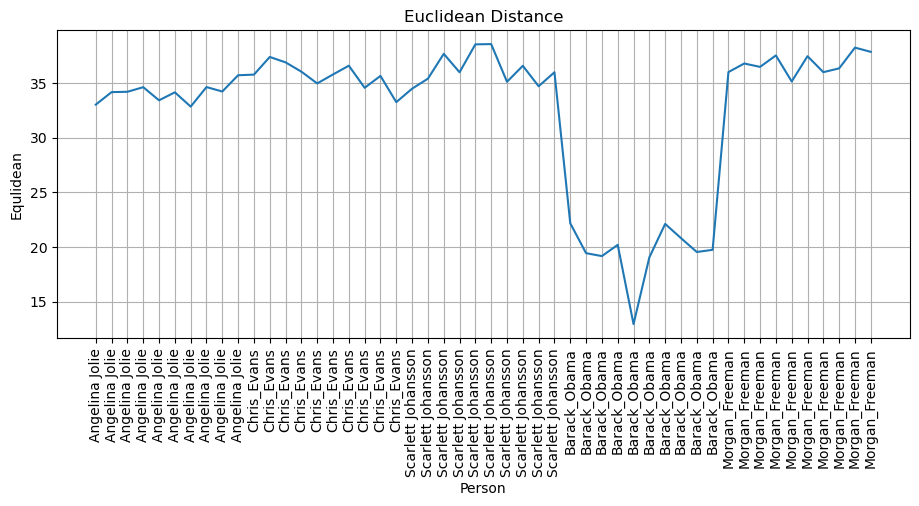

In [192]:
plt.figure(figsize=(11,4))
plt.plot(df_extended['equlidean'])
plt.xlabel('Person')
plt.ylabel('Equlidean')
plt.xticks(ticks=list(range(len(df_extended['equlidean']))),labels=df_extended['Name'], rotation=90)
plt.grid()
plt.title('Euclidean Distance')
plt.show()

In [193]:
# Manhattan Distance plotting

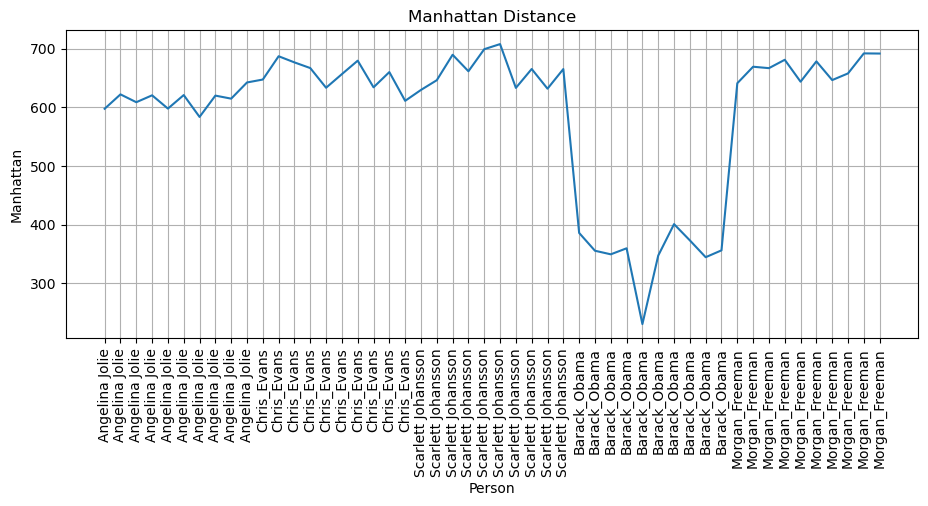

In [194]:
plt.figure(figsize=(11,4))
plt.plot(df_extended['manhattan'])
plt.xlabel('Person')
plt.ylabel('Manhattan')
plt.xticks(ticks=list(range(len(df_extended['manhattan']))),labels=df_extended['Name'], rotation=90)
plt.grid()
plt.title('Manhattan Distance')
plt.show()

In [195]:
# Cosine Similarity plotting

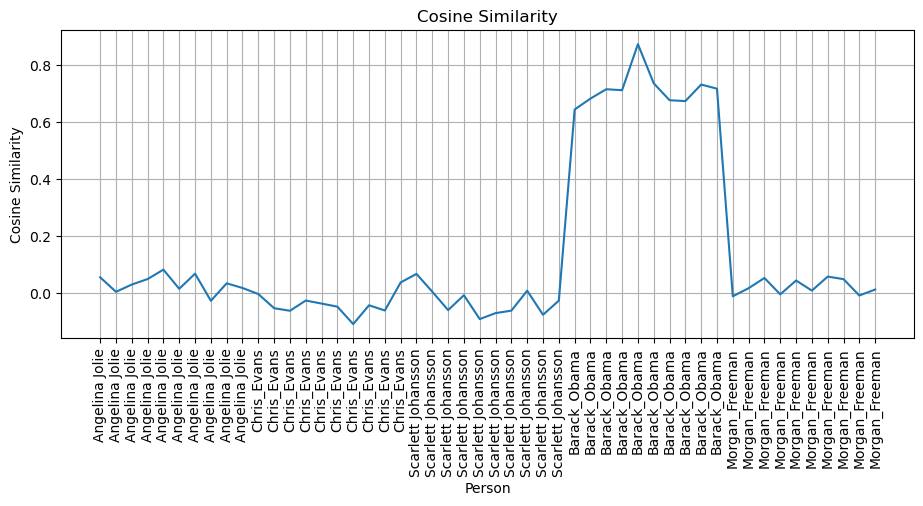

In [196]:
plt.figure(figsize=(11,4))
plt.plot(df_extended['cosine'])
plt.xlabel('Person')
plt.ylabel('Cosine Similarity')
plt.xticks(ticks=list(range(len(df_extended['cosine']))),labels=df_extended['Name'], rotation=90)
plt.grid()
plt.title('Cosine Similarity')
plt.show()

# Identify Person using Equlidean Distance

In [197]:
optimal_eqdistance = 25

In [198]:
# print data whose equlidean distance is less than optimal distance gives the person name
df_extended = df_extended[df_extended['equlidean'] < optimal_eqdistance]
df_extended.reset_index(drop=True, inplace=True)
name,role
if len(df_extended):
    # get data with minimum equlidean distance
    argmin = df_extended['equlidean'].argmin()
    person_data = df_extended.loc[argmin]
    name,role = person_data[['Name','Role']]
#     print(argmin)
else:
    name, role = 'unknown'

print(f"Name {name} and Role:{role}")

Name Barack_Obama and Role:teacher


# Identify Person using Cosine Similarity

In [199]:
optimal_cosine = 0.5

In [200]:
# print data whose cosine similarity is more than optimal_cosine gives the person name
df_extended = df_extended[df_extended['cosine'] > optimal_cosine]
df_extended.reset_index(drop=True, inplace=True)
name,role= '',''
cosine = 0.0
if len(df_extended):
    # get data with minimum equlidean distance
    argmax = df_extended['cosine'].argmax()
    person_data = df_extended.loc[argmax]
    name,role,cosine = person_data[['Name','Role','cosine']]
#     print(argmin)
else:
    name, role = 'unknown'

print(f"Name {name} and Role:{role} with Cosien Similarity {cosine}")

Name Barack_Obama and Role:teacher with Cosien Similarity 0.8733829259872437


# Face Searching Algorithm

In [201]:
def mL_search_algorithm(df,feature_column,test_data,threshold=0.5):
    """
    Perform a machine learning search.

    Parameters:
    -----------
    df : pandas DataFrame
    Original dataset of metadata of training images.

    feature_column : str
    Name of the column containing features usually 'Facial_Features'

    test_data : array-like
    metadata of test_iamge for similarity calculation.

    threshold : float, optional (default=0.5)
    Threshold for similarity above which a match is considered.

    Returns:
    --------
    tuple (str, str)
    Name and role of the person with highest similarity.
    ('Unknown', 'Unknown') if no match is found above threshold.
    """

    # 1. copy the dataframe and prepare for next step
    df_temp = df.copy()

    # 2. get face embeding from dataframe and prepare X(pretrained data) and y(test_data)
    X_list = df[feature_column].tolist()
    X = np.asarray(X_list)

    # reshape data to 1 row and as many columns as necessary
    y = test_data.reshape(1,-1)

    # 3. Calculate cosine similarity
    similarity = pairwise.cosine_similarity(X,y)
    similarity_array = np.array(similarity).flatten()
    df['cosine'] = similarity_array

    # 4. Filter the data with highest Cosine similarity
    person_name, role = '',''
    filter_query = df['cosine'] > threshold
    filtered_data = df[filter_query]
    if len(filtered_data) > 0:
        filtered_data.reset_index(drop = True, inplace= True)
        # argmax returns index of maxium_value
        cosine_argmax = filtered_data['cosine'].argmax()
        person_name, role = filtered_data.loc[cosine_argmax][['Name','Role']]
    else:
        person_name,role='Unknown','Unknown'

    return person_name, role

    
    

# Identify multiple person in image

In [202]:
test_image = cv2.imread(f'{test_image_dir}/test_11.jpg')
cv2.imshow('Multiple Image test', test_image)
cv2.waitKey()
cv2.destroyAllWindows()


In [203]:
# test_image_data contains data of each person appearing in the image in list
# information of each person is in a index of list
image_information = app_sc.get(test_image)
image_copy = test_image.copy()
# we can use loop to get data of every person and to manipulate the input image 
# eg draw rectangle around recognized  person's face 
type(image_information)
df.head()
for info in image_information:
    bbox = info['bbox'].astype(int)
    embeddings = info['embedding']
    print(mL_search_algorithm(df,'Facial Features',embeddings))
    person_name , role = mL_search_algorithm(df,'Facial Features',embeddings)
    x1,y1,x2,y2 = info['bbox'].astype(int)
    # set text_color green if the person name is present else red 
    text_color = (0,255,0) if person_name != 'Unknown' else (0,0,255)
    cv2.rectangle(image_copy,(x1,y1),(x2,y2),text_color,2)
    cv2.putText(image_copy,person_name,(x1,y1-10),cv2.FONT_HERSHEY_DUPLEX,0.5,text_color)

cv2.imshow('Test image',image_copy)
cv2.waitKey()
cv2.destroyAllWindows()

('Unknown', 'Unknown')
('Unknown', 'Unknown')
('Barack_Obama', 'teacher')
('Unknown', 'Unknown')
('Unknown', 'Unknown')
('Unknown', 'Unknown')
('Unknown', 'Unknown')
('Unknown', 'Unknown')
('Unknown', 'Unknown')
('Unknown', 'Unknown')
('Unknown', 'Unknown')
('Unknown', 'Unknown')


# Compress dataframe
Take mean of each Student/ Teacher facial expression and store only one data at database to reduce computing time and storage space without effect in performance

In [204]:
df_compressed = df.groupby(['Name','Role']).mean()
df_compressed.reset_index(inplace=True)
df_compressed

,Name,Role,Facial Features,cosine
0,Angelina Jolie,student,"[0.43239492, 1.0748208, -0.12874822, -1.833274...",-0.055578
1,Barack_Obama,teacher,"[0.94851226, -0.5582868, 0.09495868, -1.279620...",-0.109103
2,Chris_Evans,student,"[0.7200426, -1.4685223, -0.7779212, -1.460148,...",0.028200
3,Morgan_Freeman,teacher,"[0.48528442, -0.619405, -0.4070305, 1.0686811,...",0.071180
4,Scarlett Johansson,student,"[0.19131908, -0.48838148, -1.690325, 0.4423288...",0.013093


# Exporting data to Zip and restoring

In [205]:
# Export dataframe as numpy zip

In [206]:
column_names = df_compressed.columns
values = df_compressed.values

In [207]:
# save data as numpy zip to preserve the facial feature shape and each point's location in n x 512 data points
# save values and column names in saparate array for easier storage and retrieval
np.savez('face_dataframe_compressed.npz',values,column_names)

In [208]:
# Import numpy zip to dataframe
data_restore = np.load('face_dataframe_compressed.npz',allow_pickle=True)
# gives the stored arrays back
data_restore.files

['arr_0', 'arr_1']

In [209]:
df_restore = pd.DataFrame(data_restore['arr_0'], columns=data_restore['arr_1'])
df_restore.head()

,Name,Role,Facial Features,cosine
0,Angelina Jolie,student,"[0.43239492, 1.0748208, -0.12874822, -1.833274...",-0.055578
1,Barack_Obama,teacher,"[0.94851226, -0.5582868, 0.09495868, -1.279620...",-0.109103
2,Chris_Evans,student,"[0.7200426, -1.4685223, -0.7779212, -1.460148,...",0.0282
3,Morgan_Freeman,teacher,"[0.48528442, -0.619405, -0.4070305, 1.0686811,...",0.07118
4,Scarlett Johansson,student,"[0.19131908, -0.48838148, -1.690325, 0.4423288...",0.013093
